## Homework7:判断违约概率

* 2020年4月20日
* 周嘉楠 19210980081

### 问题1. 读入数据并了解各个自变量的含义
#### 1.1 导入数据

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.metrics import roc_curve, auc
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']

In [19]:
lines = np.loadtxt('simudata.csv', delimiter=',', dtype='str')
print('数据集大小:',lines.shape[0]-1)
print('数据集特征:',lines.shape[1])
print('数据集特征列表:',lines[0])

数据集大小: 8032
数据集特征: 27
数据集特征列表: ['creded' 'debitF' 'meanpay' 'billnum' 'debitM' 'zhongxingM' 'sidaM'
 'xindaiR' 'cardnum' 'xindaiF' 'maxpay' 'zhuanzhangF' 'gongjiaoF'
 'zhuanzhangR' 'age' 'gongjiaoR' 'sidaF' 'sidaR' 'zhongxingF' 'zhongxingR'
 'xiaofeiF' 'jinkaF' 'zhuanzhangM' 'gongjiaoM' 'youxiM' 'xindaiS' 'black']


In [20]:
data = pd.DataFrame(lines[1:],columns=lines[0],dtype='float64')
data.head()

,creded,debitF,meanpay,billnum,debitM,zhongxingM,sidaM,xindaiR,cardnum,xindaiF,...,sidaR,zhongxingF,zhongxingR,xiaofeiF,jinkaF,zhuanzhangM,gongjiaoM,youxiM,xindaiS,black
0,0.02,28.0,474795.0,4.0,784137.54,56826.0,307042.0,365.00,2.0,6.0,...,7.83,4.0,334.38,6.0,9.0,508646.02,297.83,66.02,5760.22,1.0
1,0.16,2.0,346573.0,32.0,1217.43,43644.0,15096.0,311.73,9.0,0.0,...,91.77,14.0,365.00,1.0,11.0,425876.24,3521.03,22.75,83872.62,1.0
2,0.32,56.0,168844.0,191.0,95001.76,279217.0,69815.0,42.32,8.0,0.0,...,36.05,10.0,27.08,1.0,2.0,492287.84,467.64,6.66,31110.55,1.0
3,0.01,28.0,69002.0,89.0,487782.48,273731.0,329437.0,81.60,15.0,1.0,...,10.08,8.0,191.04,1.0,8.0,240067.26,288.67,119.98,7876.13,1.0
4,0.19,6.0,408647.0,104.0,22039.56,13529.0,24725.0,254.60,17.0,9.0,...,324.21,23.0,248.39,7.0,0.0,455464.47,11834.25,28.97,13765.38,0.0


In [21]:
# 定量变量
quant_var = list(data.loc[:,data.columns != 'black'].columns)
print('定量特征有：',len(quant_var),'个')
print('定量特征为：',quant_var)
print('定量特征描述：\n',data.loc[:,data.columns != 'black'].astype('float').describe())

定量特征有： 26 个
定量特征为： ['creded', 'debitF', 'meanpay', 'billnum', 'debitM', 'zhongxingM', 'sidaM', 'xindaiR', 'cardnum', 'xindaiF', 'maxpay', 'zhuanzhangF', 'gongjiaoF', 'zhuanzhangR', 'age', 'gongjiaoR', 'sidaF', 'sidaR', 'zhongxingF', 'zhongxingR', 'xiaofeiF', 'jinkaF', 'zhuanzhangM', 'gongjiaoM', 'youxiM', 'xindaiS']
定量特征描述：
             creded       debitF       meanpay      billnum        debitM  \
count  8032.000000  8032.000000  8.032000e+03  8032.000000  8.032000e+03   
mean      0.144796    35.455802  2.717996e+05    74.471489  3.050731e+05   
std       0.143946    35.141984  2.352257e+05    71.310466  2.597760e+05   
min       0.000000     0.000000  0.000000e+00     0.000000  2.600000e+01   
25%       0.020000     5.000000  5.047525e+04    11.000000  5.930946e+04   
50%       0.100000    25.000000  2.312770e+05    55.000000  2.648380e+05   
75%       0.240000    57.000000  4.253420e+05   119.000000  4.796458e+05   
max       0.820000   202.000000  1.346594e+06   427.000000  1.436

#### 1.2 缺失值处理
结论：数据完整，没有缺失值

In [22]:
# 查看每列数据是否有缺失值：没有缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8032 entries, 0 to 8031
Data columns (total 27 columns):
creded         8032 non-null float64
debitF         8032 non-null float64
meanpay        8032 non-null float64
billnum        8032 non-null float64
debitM         8032 non-null float64
zhongxingM     8032 non-null float64
sidaM          8032 non-null float64
xindaiR        8032 non-null float64
cardnum        8032 non-null float64
xindaiF        8032 non-null float64
maxpay         8032 non-null float64
zhuanzhangF    8032 non-null float64
gongjiaoF      8032 non-null float64
zhuanzhangR    8032 non-null float64
age            8032 non-null float64
gongjiaoR      8032 non-null float64
sidaF          8032 non-null float64
sidaR          8032 non-null float64
zhongxingF     8032 non-null float64
zhongxingR     8032 non-null float64
xiaofeiF       8032 non-null float64
jinkaF         8032 non-null float64
zhuanzhangM    8032 non-null float64
gongjiaoM      8032 non-null float64
youxi

### 问题2：对变量交易笔数和所有用户行为均值分别绘制违约组和非违约组的对比箱线图，并分析是否违约与这些变量之间的关系，给出解读

### 2.1 交易笔数

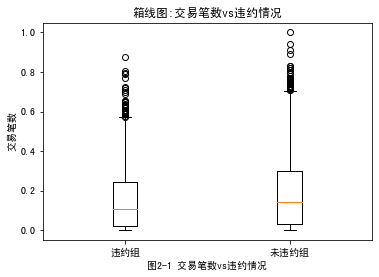

In [56]:
# 进行索引
billnum_def = np.array(data['billnum'])[np.where(data['black']==1)]
billnum_udf = np.array(data['billnum'])[np.where(data['black']==0)]

# 画出箱线图
plt.figure(figsize=(13, 4))
plt.subplot(121)
labels = ['违约组','未违约组']
plt.boxplot([billnum_def,billnum_udf],labels=labels)
plt.title("箱线图:交易笔数vs违约情况",fontsize='large')
plt.xlabel('图2-1 交易笔数vs违约情况',fontsize='medium')
plt.ylabel('交易笔数',fontsize='medium')
plt.show()

从交易笔数vs违约情况的箱线图中可以看到，未违约组的交易笔数中位数明显高于违约组的交易笔数，同时未违约组有较多交易笔数更大的用户（离群值更高）。

### 2.2 所有行为均值

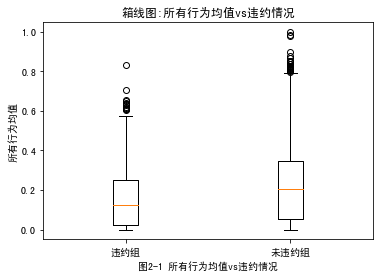

In [57]:
# 进行索引
meanpay_def = np.array(data['meanpay'])[np.where(data['black']==1)]
meanpay_udf = np.array(data['meanpay'])[np.where(data['black']==0)]

# 画出箱线图
plt.figure(figsize=(13, 4))
plt.subplot(121)
labels = ['违约组','未违约组']
plt.boxplot([meanpay_def,meanpay_udf],labels=labels)
plt.title("箱线图:所有行为均值vs违约情况",fontsize='large')
plt.xlabel('图2-1 所有行为均值vs违约情况',fontsize='medium')
plt.ylabel('所有行为均值',fontsize='medium')
plt.show()

从所有行为均值vs违约情况的箱线图中可以看到，未违约组的所有行为均值中位数明显高于违约组的所有行为均值，意味着未违约组用户所有交易行为的平均金额更高，与正常情况相符，而违约组的所有交易行为的平均金额较低，意味着用户财务状况和消费能力较差。

### 问题3. 用全部样本数据，以是否违约为因变量建立逻辑回归模型，利用BIC准则进行变量筛选，观察最终得到的回归系数并尝试解释对系数进行解释

#### 3.1 数据处理：将定量变量归一化

In [25]:
# 对定量变量做归一化处理（输出结果是0~1之间数值）
data[quant_var] = MinMaxScaler().fit_transform(data[quant_var])

#### 3.2 提取数据

In [26]:
# 提取表格中的特征features、标签labels
x_total = np.array(data.loc[:, data.columns != 'black'].astype('float'))
y_total = np.array(data.loc[:, data.columns == 'black'].astype('float')).flatten()    # 将y_total变为行向量

# 标签分类定位
# 定位出所有y_total为1的索引值（pos_index属性为tuple）
pos_index = np.where(y_total == 1)
# 定位出所有y_total为0的索引值（neg_index属性为tuple）
neg_index = np.where(y_total == 0)

#### 3.3 逻辑回归模型:L1正则化

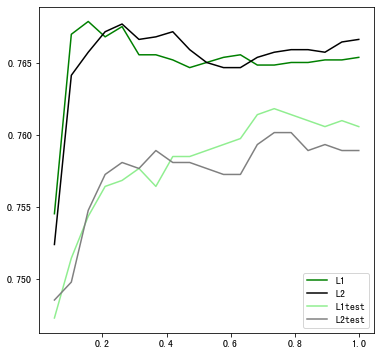

In [59]:
# 分别做L1、L2正则化，并画图选择最优参数

l1 = []
l2 = []
l1test = []
l2test = []

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_total,y_total,test_size=0.3,random_state=420)

for i in np.linspace(0.05,1,19):

    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)

    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))

    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]

plt.figure(figsize=(6, 6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.show()

结果说明：选择L1正则化，正则化强度倒数C选择0.7，这样的模型效果最好

In [28]:
# L1正则化训练模型
lrl1 = LR(penalty="l1",solver="liblinear",C=0.7,max_iter=1000)
lrl1 = lrl1.fit(x_total,y_total)
print('模型准确度：',accuracy_score(lrl1.predict(x_total),y_total))
print('模型系数：\n',lrl1.coef_)
print('模型参数有：',(lrl1.coef_ != 0).sum(axis=1),'个')

# 找出系数最大的参数（即为对结果影响最大的参数）
print('对结果影响最大的正参数为:',data.columns[lrl1.coef_.argmax()])
print('对结果影响最大的负参数为:',data.columns[lrl1.coef_.argmin()])
print('对结果影响最大的正参数的系数为:',lrl1.coef_.flatten()[lrl1.coef_.argmax()])
print('对结果影响最大的负参数的系数为:',lrl1.coef_.flatten()[lrl1.coef_.argmin()])

模型准确度： 0.7643177290836654
模型系数：
 [[-3.22652673 -2.29079155 -3.04630939 -1.69582002 -0.75087287 -0.42465768
  -1.3672136   1.92955429  2.89301685  2.3130234   2.17308606  2.08715427
   1.55954836  1.60328178  2.11837017  0.83620244  0.65439386  0.22819326
   0.58999877  0.29839887  0.71820502  0.55149647 -0.43718547  0.75992479
   0.50427094  0.35039226]]
模型参数有： [26] 个
对结果影响最大的正参数为: cardnum
对结果影响最大的负参数为: creded
对结果影响最大的正参数的系数为: 2.8930168487834664
对结果影响最大的负参数的系数为: -3.2265267349983078


In [29]:
print('模型所有参数：')
[*zip(data.columns[:-1],lrl1.coef_.flatten().tolist())]

模型所有参数：


[('creded', -3.2265267349983078),
 ('debitF', -2.2907915531106036),
 ('meanpay', -3.0463093918487223),
 ('billnum', -1.6958200242031487),
 ('debitM', -0.7508728683434108),
 ('zhongxingM', -0.42465767592533515),
 ('sidaM', -1.3672136000742854),
 ('xindaiR', 1.9295542870595672),
 ('cardnum', 2.8930168487834664),
 ('xindaiF', 2.313023404765529),
 ('maxpay', 2.173086055614373),
 ('zhuanzhangF', 2.087154269760282),
 ('gongjiaoF', 1.5595483643010029),
 ('zhuanzhangR', 1.603281783178127),
 ('age', 2.118370166274002),
 ('gongjiaoR', 0.8362024352194206),
 ('sidaF', 0.6543938611480398),
 ('sidaR', 0.2281932564066994),
 ('zhongxingF', 0.5899987732884395),
 ('zhongxingR', 0.29839886513660197),
 ('xiaofeiF', 0.7182050157657706),
 ('jinkaF', 0.5514964737456358),
 ('zhuanzhangM', -0.43718546633767774),
 ('gongjiaoM', 0.7599247947894275),
 ('youxiM', 0.504270942558938),
 ('xindaiS', 0.35039225633795096)]

1. 其中有8个特征的参数为负数，即"借贷比率、借记类F、所有行为均值、交易笔数、借记类M、中型银行M、四大行M、转账类M"，意味着这些特征越大，预测结果越接近0类别（即未违约），其中"借贷比率"的系数绝对值最大，即借贷比率在对预测是否违约的结果中影响因素最大。
2. 剩余18个特征的参数均为正数，意味着这些特征越大，预测结果越接近1类别（即违约），其中"银行卡数"的系数最大，即银行卡数在对预测是否违约的结果中影响因素最大。

### 问题4. 使用任务3的模型，对全部样本进行预测，计算AUC值，并绘制ROC曲线，对模型的效果进行评估

AUC: 0.8268438496976998


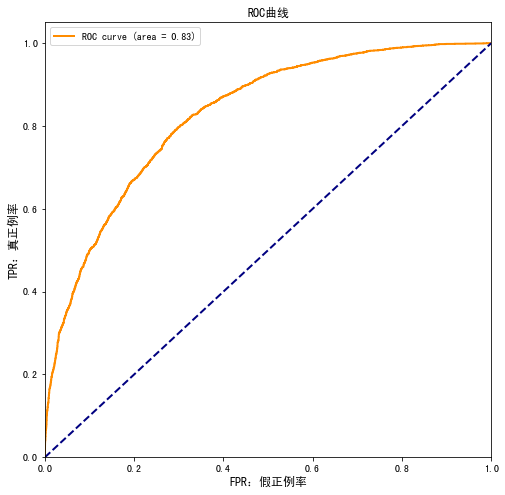

In [62]:
# 通过decision_function()计算得到的y_score的值，用在roc_curve()函数中
y_score = lrl1.decision_function(x_total)

# 计算真正率和假正率
fpr,tpr,threshold = roc_curve(y_total, y_score)

# 计算AUC的值
roc_auc = auc(fpr,tpr)
print('AUC:',roc_auc)

# 画出ROC曲线
lw = 2
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR：假正例率',fontsize='large')
plt.ylabel('TPR：真正例率',fontsize='large')
plt.title('ROC曲线',fontsize='large')
plt.legend(loc="best")
plt.show()

从ROC曲线中可以看出本模型预测效果较好，ROC曲线凸性较大，其中AUC面积占到了0.83

1. 其中有8个特征的参数为负数，即"借贷比率、借记类F、所有行为均值、交易笔数、借记类M、中型银行M、四大行M、转账类M"，意味着这些特征越大，预测结果越接近0类别（即未违约），其中"借贷比率"的系数绝对值最大，即借贷比率在对预测是否违约的结果中影响因素最大。
2. 剩余18个特征的参数均为正数，意味着这些特征越大，预测结果越接近1累呗（即违约），其中"银行卡数"的系数最大，即银行卡数在对预测是否违约的结果中影响因素最大。

### 问题5. 任务4中对每个训练样本预测出了非违约的概率，按照非违约率从高到低排序，将全部样本分为5组人群：非违约率最高的20%用户、…、非违约率最低的20%用户，计算五类人群的平均非违约概率，从高到低排序，绘制柱状图；对结果的商业应用进行解读。

In [38]:
# 计算预测未违约、违约概率
y_pred_prob = lrl1.predict_proba(x_total)

# 将结果生成DataFrame
data_prob = pd.DataFrame(y_pred_prob,columns=['未违约概率','违约概率'])

# 对未违约概率进行等频分箱，每个箱中样本数量相同
data_prob["未违约分箱"] = pd.qcut(data_prob["未违约概率"],5,labels=['未违约排名5','未违约排名4','未违约排名3','未违约排名2','未违约排名1'])

In [55]:
# 计算五类人群的平均非违约概率
prob_result = []
for i in range(1,6):
    a = np.array(data_prob["未违约概率"])[np.where(data_prob["未违约分箱"] == '未违约排名%d' % i)].mean()
    prob_result.append(a)
prob_result

[0.9521260659450207,
 0.8566989001722156,
 0.7237079192346454,
 0.5406155105442119,
 0.2576677066956358]

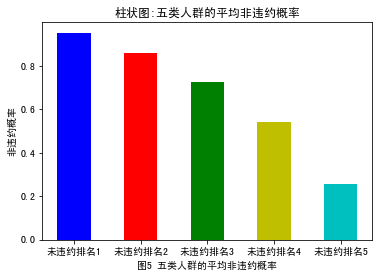

In [63]:
# 绘制柱状图
plt.figure(figsize=(13, 4))
plt.subplot(121)
x = ['未违约排名5','未违约排名4','未违约排名3','未违约排名2','未违约排名1'][::-1]
y = prob_result
plt.bar(x,y,width=0.5, color=['b','r','g','y','c'])
plt.title("柱状图:五类人群的平均非违约概率",fontsize='large')
plt.xlabel('图5 五类人群的平均非违约概率',fontsize='medium')
plt.ylabel('非违约概率',fontsize='medium')
plt.show()

从预测概率的结果可以得出，5类人群平均非违约概率分别为：95.21%、85.67%、72.37%、54.06%、25.77%，从概率上看，前四类人群的非违约概率均大于50%，若按逻辑回归模型会将结果归为“未违约”类别，可以针对前四类用户的特征进行进一步的探索，而最后一类人群的未违约概率较小，模型会将其分类为“违约”类别。